In [5]:
import os
import sys
import pandas as pd
import numpy as np
from descartes import PolygonPatch
import matplotlib.pyplot as plt
sys.path.insert(0, os.path.dirname(os.getcwd()))
import alphashape
import rospkg
import networkx as nx


In [15]:
dirname = rospkg.RosPack().get_path('mrpp_sumo')


graph_name = 'iitb_full'
no_of_base_stations = 10

# graph_name = sys.argv[1]
# no_of_base_stations = int(sys.argv[2])


graph_path = dirname +'/graph_ml/'+ graph_name + '.graphml'
graph_results_path = dirname +'/scripts/algorithms/partition_based_patrolling/graphs_partition_results/'+ graph_name + '/' + str(no_of_base_stations) + '_base_stations/'
graph = nx.read_graphml(graph_path)

In [16]:
points_2d = [(0., 0.), (0., 1.), (1., 1.), (1., 0.),
          (0.5, 0.25), (0.5, 0.75), (0.25, 0.5), (0.75, 0.5)]


old_points = []
for node,data in graph.nodes(data=True):
    old_points.append((data['x'],data['y']))
print(old_points)
points_2d = old_points

[(1106.88, 1570.64), (1290.4, 1095.8), (453.81, 1149.41), (955.53, 822.28), (448.4, 1255.07), (490.58, 1503.64), (0.0, 1293.82), (100.68, 1269.52), (1170.75, 1520.93), (1141.91, 1365.96), (1003.85, 1461.99), (1139.28, 1431.73), (1221.14, 1475.62), (1327.27, 1327.23), (1299.96, 1412.56), (904.68, 1630.03), (931.02, 1538.37), (867.34, 1505.41), (781.23, 1548.96), (792.18, 1493.54), (1121.57, 1165.46), (915.93, 952.21), (237.14, 1229.32), (208.85, 1239.29), (893.33, 1290.21), (850.41, 1171.61), (826.18, 1103.81), (765.4, 1337.47), (671.66, 1342.89), (1062.66, 626.08), (826.27, 1339.12), (1302.27, 496.79), (1142.08, 281.14), (1008.61, 482.62), (965.32, 485.94), (1105.22, 244.99), (1048.61, 209.74), (1039.06, 234.86), (1145.9, 1249.62), (731.86, 70.79), (727.73, 157.58), (911.68, 394.54), (819.73, 385.4), (917.24, 710.01), (965.97, 710.43), (953.0, 864.75), (850.53, 534.97), (376.7, 1458.29), (350.55, 1349.18), (299.78, 1206.88), (978.08, 1780.5), (760.81, 1608.86), (693.77, 1596.33), (934.

In [31]:
alpha_shape = alphashape.alphashape(points_2d)
type(alpha_shape)

/home/vishwajeet/.local/lib/python3.8/site-packages/shapely/ops.py:42: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  source = iter(source)
/home/vishwajeet/.local/lib/python3.8/site-packages/alphashape/optimizealpha.py:41: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  return all([polygon.intersects(point) for point in points])


shapely.geometry.polygon.Polygon

In [47]:
x,y = alpha_shape.exterior.coords.xy
a =np.column_stack((alpha_shape.exterior.coords.xy))

for j in a:
    print(j)

[1373.24 1159.77]
[1394.7   902.15]
[1347.89  677.58]
[1349.73  626.6 ]
[1352.51  514.68]
[1302.27  496.79]
[1142.08  281.14]
[1071.9   147.32]
[1008.9   129.94]
[731.86  70.79]
[533.94   0.  ]
[385.19  91.41]
[535.78 106.98]
[819.73 385.4 ]
[790.03 538.64]
[626.33 838.02]
[ 453.81 1149.41]
[ 421.56 1163.27]
[ 299.78 1206.88]
[ 237.14 1229.32]
[ 208.85 1239.29]
[ 100.68 1269.52]
[   0.   1293.82]
[ 376.7  1458.29]
[ 490.58 1503.64]
[ 693.77 1596.33]
[ 760.81 1608.86]
[ 978.08 1780.5 ]
[1153.63 1767.33]
[1221.14 1475.62]
[1299.96 1412.56]
[1327.27 1327.23]
[1373.24 1159.77]


My new polygon: 
 POLYGON ((82 32.261, 79.304 32.474, 77.282 30.261, 81.037 28.354, 82 32.261))
My loaded polygon: 
 POLYGON ((82 32.261, 79.304 32.474, 77.282 30.261, 81.037 28.354, 82 32.261))


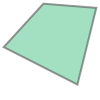

In [53]:
from shapely import geometry
import pickle

# Make a polygon
q = [(82,32.261),(79.304,32.474),(77.282,30.261),(81.037,28.354)]
polygon = geometry.Polygon(q)

# Check it out
print('My new polygon: \n', polygon)


# Save polygon to disc
with open('./my_polygon.hull', "wb") as poly_file:
    pickle.dump(polygon, poly_file, pickle.HIGHEST_PROTOCOL)

# Load polygon from disc
with open('./my_polygon.hull', "rb") as poly_file:
    loaded_polygon = pickle.load(poly_file)

# Check it out again
print('My loaded polygon: \n', loaded_polygon)
polygon
# loaded_polygon

In [4]:
from shapely.geometry import Polygon

polygon1 = Polygon([(2,0),(3,0),(3,3),(2,3)])
polygon2 = Polygon([(0,2),(0,1),(4,1),(4,2)])

In [7]:
difference = polygon2.difference(polygon1)  # or difference = polygon2 - polygon1
difference2 =polygon2.difference(difference)
difference2

(<shapely.geometry.polygon.Polygon at 0x7f8720277490>,
 <shapely.geometry.multipolygon.MultiPolygon at 0x7f870a6a15e0>)